In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
df = pd.read_csv("NYSERDA_Electric_Vehicle_Drive_Clean_Rebate_Data__Beginning_2017.csv")

In [4]:
df.head()

,Data through Date,Submitted Date,Make,Model,County,ZIP,EV Type,Transaction Type,Annual GHG Emissions Reductions (MT CO2e),Annual Petroleum Reductions (gallons),Rebate Amount (USD)
0,03/31/2020,01/13/2018,Ford,Focus,Westchester,10598,BEV,Lease,2.76,592.89,1700
1,03/31/2020,09/25/2017,Ford,Focus,Oneida,13601,BEV,Lease,2.76,592.89,1700
2,03/31/2020,04/26/2018,Ford,Focus,Suffolk,11776,BEV,Lease,2.76,592.89,1700
3,03/31/2020,08/30/2017,Ford,Focus,Nassau,11756,BEV,Lease,2.76,592.89,1700
4,03/31/2020,05/29/2018,Ford,Focus,Onondaga,13039,BEV,Purchase,2.76,592.89,1700


In [5]:
df.dtypes

Data through Date                             object
Submitted Date                                object
Make                                          object
Model                                         object
County                                        object
ZIP                                            int64
EV Type                                       object
Transaction Type                              object
Annual GHG Emissions Reductions (MT CO2e)    float64
Annual Petroleum Reductions (gallons)        float64
Rebate Amount (USD)                            int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23827 entries, 0 to 23826
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Data through Date                          23827 non-null  object 
 1   Submitted Date                             23827 non-null  object 
 2   Make                                       23827 non-null  object 
 3   Model                                      23827 non-null  object 
 4   County                                     23826 non-null  object 
 5   ZIP                                        23827 non-null  int64  
 6   EV Type                                    23827 non-null  object 
 7   Transaction Type                           23827 non-null  object 
 8   Annual GHG Emissions Reductions (MT CO2e)  23827 non-null  float64
 9   Annual Petroleum Reductions (gallons)      23827 non-null  float64
 10  Rebate Amount (USD)   

In [8]:
count = df['ZIP'].value_counts() 
print(count) 

11746    276
14850    248
10583    200
14450    198
14534    185
        ... 
12063      1
12151      1
12089      1
12167      1
13454      1
Name: ZIP, Length: 1367, dtype: int64


## Understanding the geographical data

### These Zip code have the top 5 EV owners

#### 11746   -  276

#### 14850   -  248

#### 10583   -  200

#### 14450   -  198

#### 14534   -  185

In [10]:
count = df['Make'].value_counts() 
print(count) 

Toyota           5898
Tesla            5384
Chevrolet        3146
Honda            2088
Ford             1902
Hyundai          1293
BMW              1104
Kia              1026
Nissan            765
Mitsubishi        512
Chrysler          210
Subaru            139
Volkswagen        103
Smart              94
Audi               45
Jaguar             39
Mercedes-Benz      32
MINI               19
Volvo              18
Porsche            10
Name: Make, dtype: int64


## Understanding the Make of the vehicles data

### These are the top vehicle manufactures that people purchase

#### Toyota           5898
#### Tesla            5384
#### Chevrolet        3146
#### Honda            2088
#### Ford             1902
#### Hyundai          1293
#### BMW              1104
#### Kia              1026

In [12]:
count = df['Model'].value_counts() 
print(count) 

Prius Prime                  5898
Model 3                      4015
Clarity                      2088
Volt                         1645
Fusion Energi                1627
Bolt                         1501
LEAF                          765
Ionic Plug-In Hybrid          749
Model X                       739
Model S                       630
Outlander                     512
Soul EV                       498
530e                          497
Ionic_Electric                322
X5                            274
Niro                          264
Optima Plug-in                264
C-MAX Energi                  250
i3 REx                        217
Pacifica                      210
Kona Electric                 203
Crosstrek PHEV                139
e-Golf                        103
Electric Fortwo Coupe          86
e-tron                         43
I-PACE                         39
i3                             38
740e                           34
i8                             28
Focus         

## Understanding the vehicle model most purchased

### These are the top vehicle models that people purchase

#### Prius Prime                  5898
#### Model 3                      4015
#### Clarity                      2088
#### Volt                         1645
#### Fusion Energi                1627
#### Bolt                         1501

In [13]:
count = df['County'].value_counts() 
print(count) 

Suffolk        4730
Nassau         3123
Westchester    2074
Monroe         1719
Erie           1230
               ... 
Yates            20
Seneca           20
Schuyler         19
Hamilton          6
Lewis             6
Name: County, Length: 62, dtype: int64


## Understanding the counties with the highest adoption to EV

### These are the top counties where people purchase EV 

#### Suffolk        4730
#### Nassau         3123
#### Westchester    2074
#### Monroe         1719
#### Erie           1230

In [14]:
count = df['EV Type'].value_counts() 
print(count) 

PHEV    14747
BEV      9080
Name: EV Type, dtype: int64


## Understanding the type of EV purchases

### These are the two different EV purchases

#### PHEV    14747
#### BEV      9080


In [15]:
count = df['Transaction Type'].value_counts() 
print(count) 

Purchase    13649
Lease       10178
Name: Transaction Type, dtype: int64


## Understanding the type of EV purchases between Purchase Vs. Lease

### These are the two different EV purchase type

#### Purchase    13649
#### Lease       10178

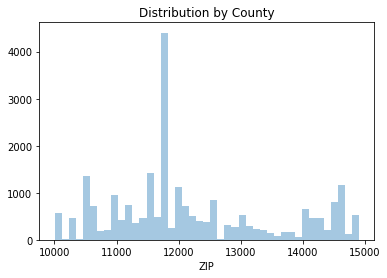

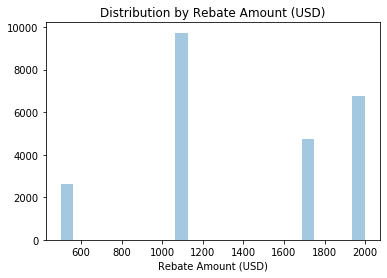

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns


fig = sns.distplot(df['ZIP'], kde=False)
plt.title("Distribution by County")
plt.show()

#fig = sns.distplot(df['Transaction Type'], kde=False)
#plt.title("Distribution by Transaction Type")
#plt.show()

#fig = sns.distplot(df['EV Type'], kde=False)
#plt.title("Distribution by EV Type")
#plt.show()

#fig = sns.distplot(df['Make'], kde=False)
#plt.title("Distribution by Make")
#plt.show()

fig = sns.distplot(df['Rebate Amount (USD)'], kde=False)
plt.title("Distribution by Rebate Amount (USD)")
plt.show()

plt.show()

In [68]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23827 entries, 0 to 23826
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Make                                       23827 non-null  int32  
 1   Model                                      23827 non-null  int32  
 2   County                                     23827 non-null  int32  
 3   ZIP                                        23827 non-null  int64  
 4   EV Type                                    23827 non-null  int32  
 5   Transaction Type                           23827 non-null  int32  
 6   Annual GHG Emissions Reductions (MT CO2e)  23827 non-null  float64
 7   Annual Petroleum Reductions (gallons)      23827 non-null  float64
 8   Rebate Amount (USD)                        23827 non-null  int64  
dtypes: float64(2), int32(5), int64(2)
memory usage: 1.2 MB


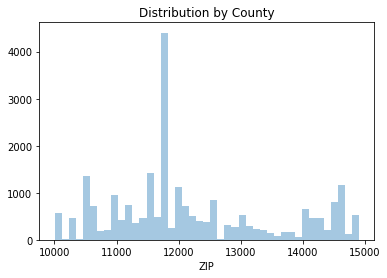

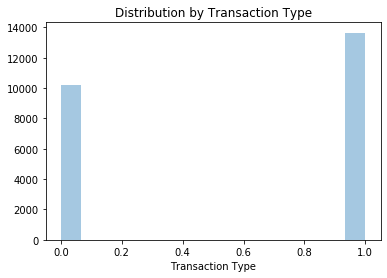

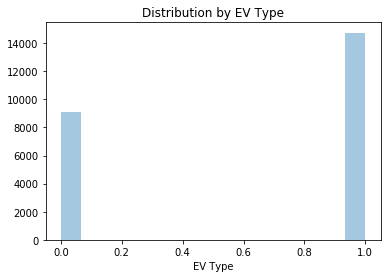

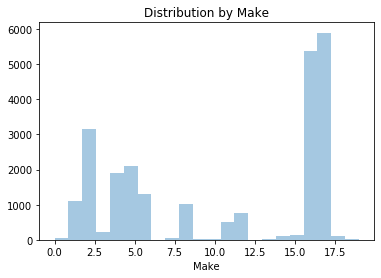

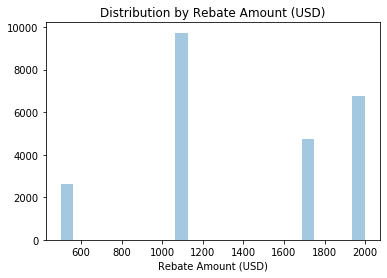

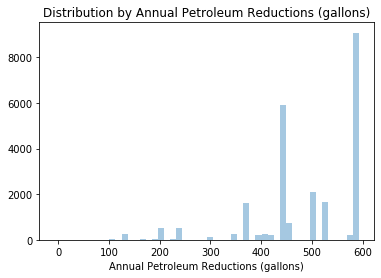

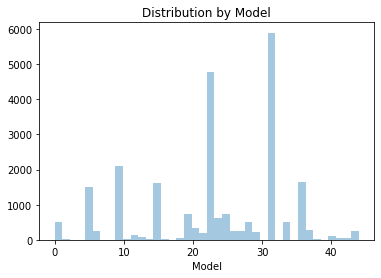

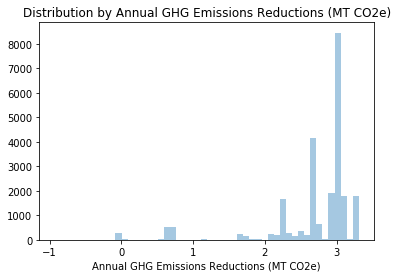

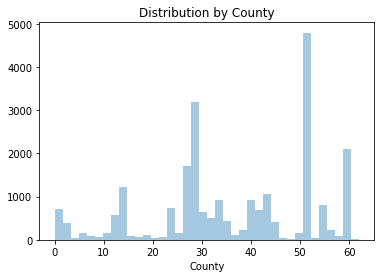

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns


fig = sns.distplot(df1['ZIP'], kde=False)
plt.title("Distribution by County")
plt.show()

fig = sns.distplot(df1['Transaction Type'], kde=False)
plt.title("Distribution by Transaction Type")
plt.show()

fig = sns.distplot(df1['EV Type'], kde=False)
plt.title("Distribution by EV Type")
plt.show()

fig = sns.distplot(df1['Make'], kde=False)
plt.title("Distribution by Make")
plt.show()

fig = sns.distplot(df1['Rebate Amount (USD)'], kde=False)
plt.title("Distribution by Rebate Amount (USD)")
plt.show()
fig = sns.distplot(df1['Annual Petroleum Reductions (gallons)'], kde=False)
plt.title("Distribution by Annual Petroleum Reductions (gallons)")
plt.show()

fig = sns.distplot(df1['Model'], kde=False)
plt.title("Distribution by Model")
plt.show()

fig = sns.distplot(df1['Annual GHG Emissions Reductions (MT CO2e)'], kde=False)
plt.title("Distribution by Annual GHG Emissions Reductions (MT CO2e)")
plt.show()

fig = sns.distplot(df1['County'], kde=False)
plt.title("Distribution by County")
plt.show()

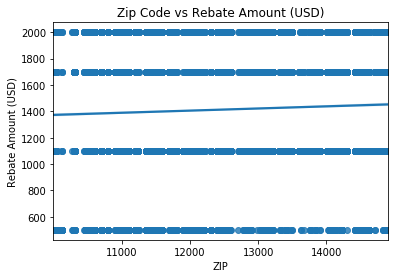

In [23]:
fig = sns.regplot(x="ZIP", y="Rebate Amount (USD)", data=df)
plt.title("Zip Code vs Rebate Amount (USD)")
plt.show()

In [30]:
data = df
data.head()

,Data through Date,Submitted Date,Make,Model,County,ZIP,EV Type,Transaction Type,Annual GHG Emissions Reductions (MT CO2e),Annual Petroleum Reductions (gallons),Rebate Amount (USD)
0,03/31/2020,01/13/2018,Ford,Focus,Westchester,10598,BEV,Lease,2.76,592.89,1700
1,03/31/2020,09/25/2017,Ford,Focus,Oneida,13601,BEV,Lease,2.76,592.89,1700
2,03/31/2020,04/26/2018,Ford,Focus,Suffolk,11776,BEV,Lease,2.76,592.89,1700
3,03/31/2020,08/30/2017,Ford,Focus,Nassau,11756,BEV,Lease,2.76,592.89,1700
4,03/31/2020,05/29/2018,Ford,Focus,Onondaga,13039,BEV,Purchase,2.76,592.89,1700


In [32]:
from sklearn.preprocessing import LabelEncoder

number = LabelEncoder()
data['Transaction Type'] = number.fit_transform(data['Transaction Type'].astype('str'))
data['EV Type'] = number.fit_transform(data['EV Type'].astype('str'))

In [33]:
data.head()

,Data through Date,Submitted Date,Make,Model,County,ZIP,EV Type,Transaction Type,Annual GHG Emissions Reductions (MT CO2e),Annual Petroleum Reductions (gallons),Rebate Amount (USD)
0,03/31/2020,01/13/2018,Ford,Focus,Westchester,10598,0,0,2.76,592.89,1700
1,03/31/2020,09/25/2017,Ford,Focus,Oneida,13601,0,0,2.76,592.89,1700
2,03/31/2020,04/26/2018,Ford,Focus,Suffolk,11776,0,0,2.76,592.89,1700
3,03/31/2020,08/30/2017,Ford,Focus,Nassau,11756,0,0,2.76,592.89,1700
4,03/31/2020,05/29/2018,Ford,Focus,Onondaga,13039,0,1,2.76,592.89,1700


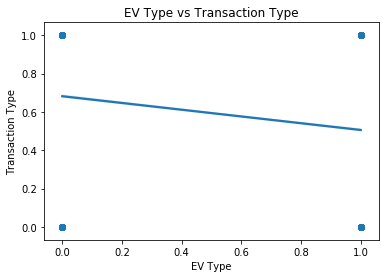

In [34]:
fig = sns.regplot(x="EV Type", y="Transaction Type", data=df)
plt.title("EV Type vs Transaction Type")
plt.show()

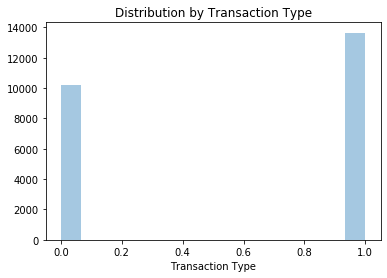

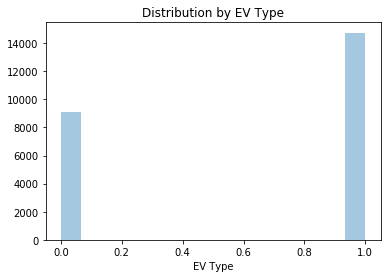

In [35]:
fig = sns.distplot(data['Transaction Type'], kde=False)
plt.title("Distribution by Transaction Type")
plt.show()

fig = sns.distplot(data['EV Type'], kde=False)
plt.title("Distribution by EV Type")
plt.show()


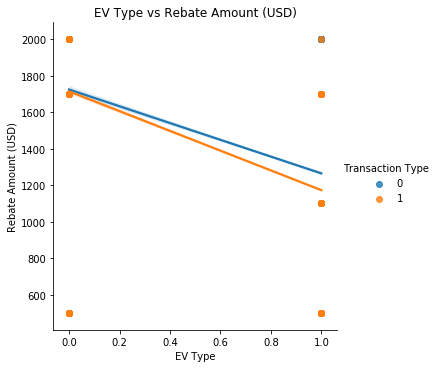

In [36]:
fig = sns.lmplot(x="EV Type", y="Rebate Amount (USD)", data=data, hue="Transaction Type")
plt.title("EV Type vs Rebate Amount (USD)")
plt.show()

In [37]:
data.corr()

,ZIP,EV Type,Transaction Type,Annual GHG Emissions Reductions (MT CO2e),Annual Petroleum Reductions (gallons),Rebate Amount (USD)
ZIP,1.000000,0.186957,0.044556,0.072219,-0.044999,0.043124
EV Type,0.186957,1.000000,-0.172715,-0.323027,-0.751351,-0.489007
Transaction Type,0.044556,-0.172715,1.000000,0.248557,0.162344,0.022938
Annual GHG Emissions Reductions (MT CO2e),0.072219,-0.323027,0.248557,1.000000,0.748825,0.508770
Annual Petroleum Reductions (gallons),-0.044999,-0.751351,0.162344,0.748825,1.000000,0.654229
Rebate Amount (USD),0.043124,-0.489007,0.022938,0.508770,0.654229,1.000000


In [38]:
corrMatrix = data.corr()
print (corrMatrix)

                                                ZIP   EV Type  \
ZIP                                        1.000000  0.186957   
EV Type                                    0.186957  1.000000   
Transaction Type                           0.044556 -0.172715   
Annual GHG Emissions Reductions (MT CO2e)  0.072219 -0.323027   
Annual Petroleum Reductions (gallons)     -0.044999 -0.751351   
Rebate Amount (USD)                        0.043124 -0.489007   

                                           Transaction Type  \
ZIP                                                0.044556   
EV Type                                           -0.172715   
Transaction Type                                   1.000000   
Annual GHG Emissions Reductions (MT CO2e)          0.248557   
Annual Petroleum Reductions (gallons)              0.162344   
Rebate Amount (USD)                                0.022938   

                                           Annual GHG Emissions Reductions (MT CO2e)  \
ZIP           

In [40]:
import seaborn as sn

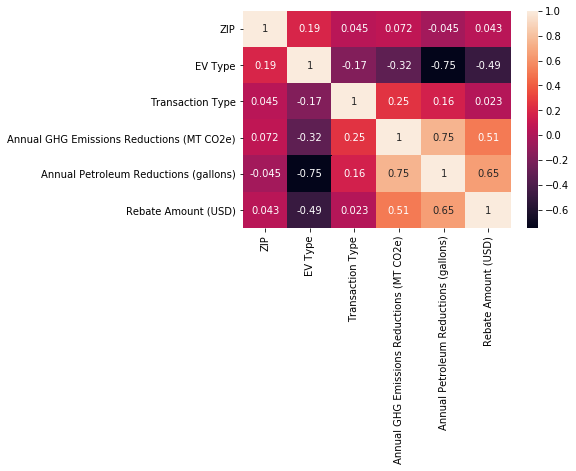

In [41]:
corrMatrix = data.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

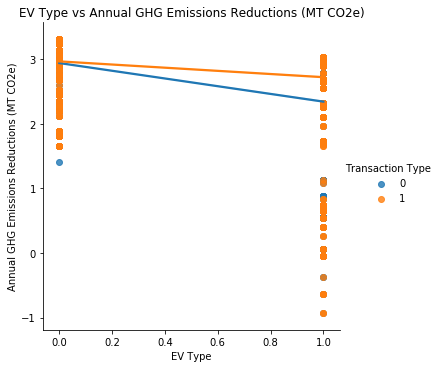

In [45]:
fig = sns.lmplot(x="EV Type", y="Annual GHG Emissions Reductions (MT CO2e)", data=data, hue="Transaction Type")
plt.title("EV Type vs Annual GHG Emissions Reductions (MT CO2e)")
plt.show()

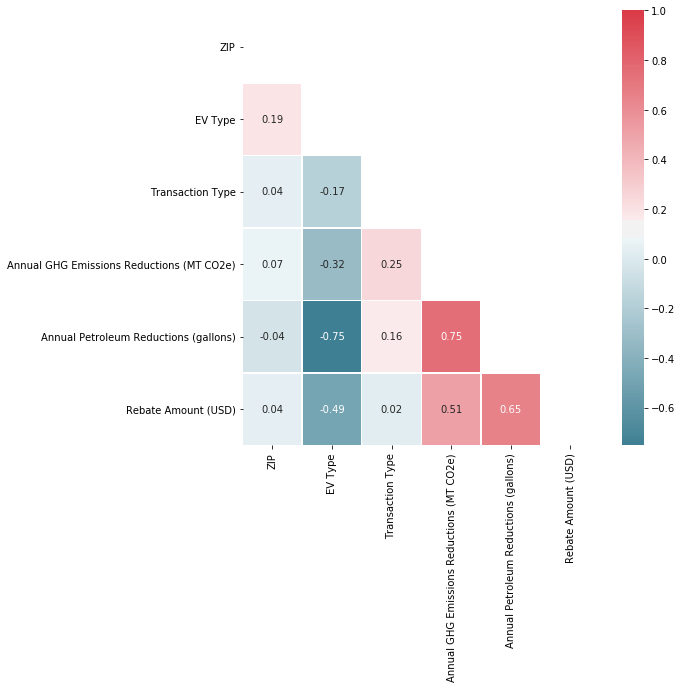

In [46]:
import numpy as np
corr = data.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

In [55]:
# pandas drop columns using list of column names
df1 = data.drop(['Data through Date', 'Submitted Date'], axis=1)

In [59]:
from sklearn.preprocessing import LabelEncoder

number = LabelEncoder()
df1['Make'] = number.fit_transform(df1['Make'].astype('str'))
df1['Model'] = number.fit_transform(df1['Model'].astype('str'))
df1['County'] = number.fit_transform(df1['County'].astype('str'))

In [60]:
df1.head()

,Make,Model,County,ZIP,EV Type,Transaction Type,Annual GHG Emissions Reductions (MT CO2e),Annual Petroleum Reductions (gallons),Rebate Amount (USD)
0,4,14,59,10598,0,0,2.76,592.89,1700
1,4,14,32,13601,0,0,2.76,592.89,1700
2,4,14,51,11776,0,0,2.76,592.89,1700
3,4,14,29,11756,0,0,2.76,592.89,1700
4,4,14,33,13039,0,1,2.76,592.89,1700


In [61]:
from sklearn.model_selection import train_test_split

X = df1.drop(['Rebate Amount (USD)'], axis=1)
y = df1['Rebate Amount (USD)']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, shuffle=False)

In [62]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor
from sklearn.metrics import mean_squared_error

models = [['DecisionTree :',DecisionTreeRegressor()],
           ['Linear Regression :', LinearRegression()],
           ['RandomForest :',RandomForestRegressor()],
           ['KNeighbours :', KNeighborsRegressor(n_neighbors = 2)],
           ['SVM :', SVR()],
           ['AdaBoostClassifier :', AdaBoostRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()],
           ['Xgboost: ', XGBRegressor()],
           ['CatBoost: ', CatBoostRegressor(logging_level='Silent')],
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['BayesianRidge: ', BayesianRidge()],
           ['ElasticNet: ', ElasticNet()],
           ['HuberRegressor: ', HuberRegressor()]]

print("Results...")


for name,model in models:
    model = model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

Results...
DecisionTree : 614.4978343227442
Linear Regression : 281.29170516295704
RandomForest : 480.87828981473984
KNeighbours : 547.0642282474224
SVM : 646.7091800550506
AdaBoostClassifier : 278.5221103137059
GradientBoostingClassifier:  479.0120867343165
[09:59:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Xgboost:  369.1410240866555
CatBoost:  378.5876741455266
Lasso:  279.37497157131946
Ridge:  281.2499749107499
BayesianRidge:  281.1595229019363
ElasticNet:  274.47554105142206
HuberRegressor:  260.6787184767754


C:\Users\indir\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


## Generate Feature Importances

In [63]:
classifier = RandomForestRegressor()
classifier.fit(X,y)
feature_names = X.columns
importance_frame = pd.DataFrame()
importance_frame['Features'] = X.columns
importance_frame['Importance'] = classifier.feature_importances_
importance_frame = importance_frame.sort_values(by=['Importance'], ascending=True)

## Visualize Feature Importances

In [66]:
#plt.barh([1,2,3,4,5,6,7,8,9], importance_frame['Importance'], align='center', alpha=0.5)
#plt.yticks([1,2,3,4,5,6,7,8,9], importance_frame['Features'])
#plt.xlabel('Importance')
#plt.title('Feature Importances')
#plt.show()

In [73]:
dfev = pd.read_csv("NYSERDA_Electric_Vehicle_Drive_Clean_Rebate_Data__Beginning_2017.csv")

In [79]:
dfev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23827 entries, 0 to 23826
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Data through Date                          23827 non-null  object 
 1   Submitted Date                             23827 non-null  object 
 2   Make                                       23827 non-null  object 
 3   Model                                      23827 non-null  object 
 4   County                                     23826 non-null  object 
 5   ZIP                                        23827 non-null  int64  
 6   EV Type                                    23827 non-null  object 
 7   Transaction Type                           23827 non-null  object 
 8   Annual GHG Emissions Reductions (MT CO2e)  23827 non-null  float64
 9   Annual Petroleum Reductions (gallons)      23827 non-null  float64
 10  Rebate Amount (USD)   

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

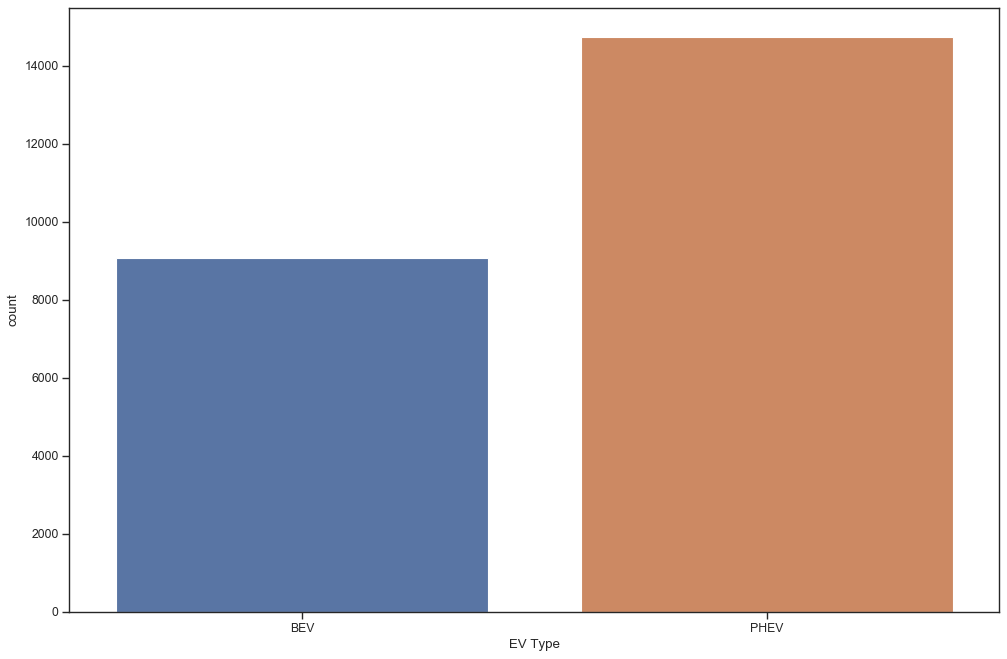

In [84]:
figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

sns.countplot(x='EV Type',data=dfev)

## EV Type 
* Type of EV powertrain; either Battery Electric Vehicle (BEV) or
* Plug-in Hybrid Electric Vehicle (PHEV)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

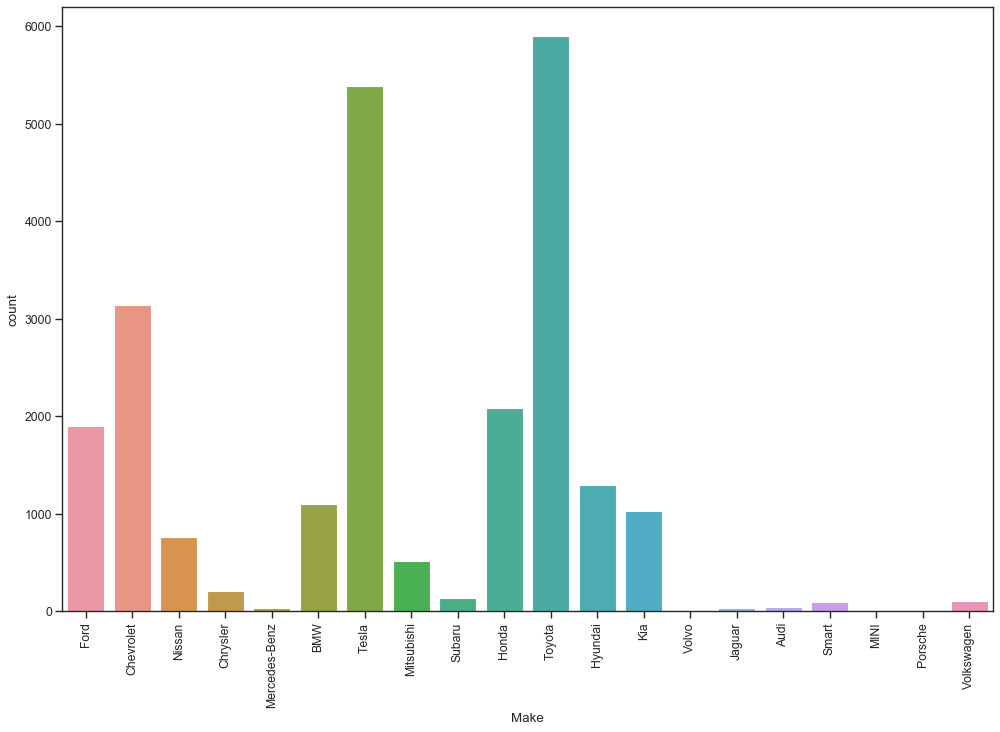

In [83]:
figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

sns.countplot(x='Make',data=dfev)
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks( rotation='vertical')


## Make 
* The manufacturer of the rebated electric vehicle (EV)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 <a list of 45 Text xticklabel objects>)

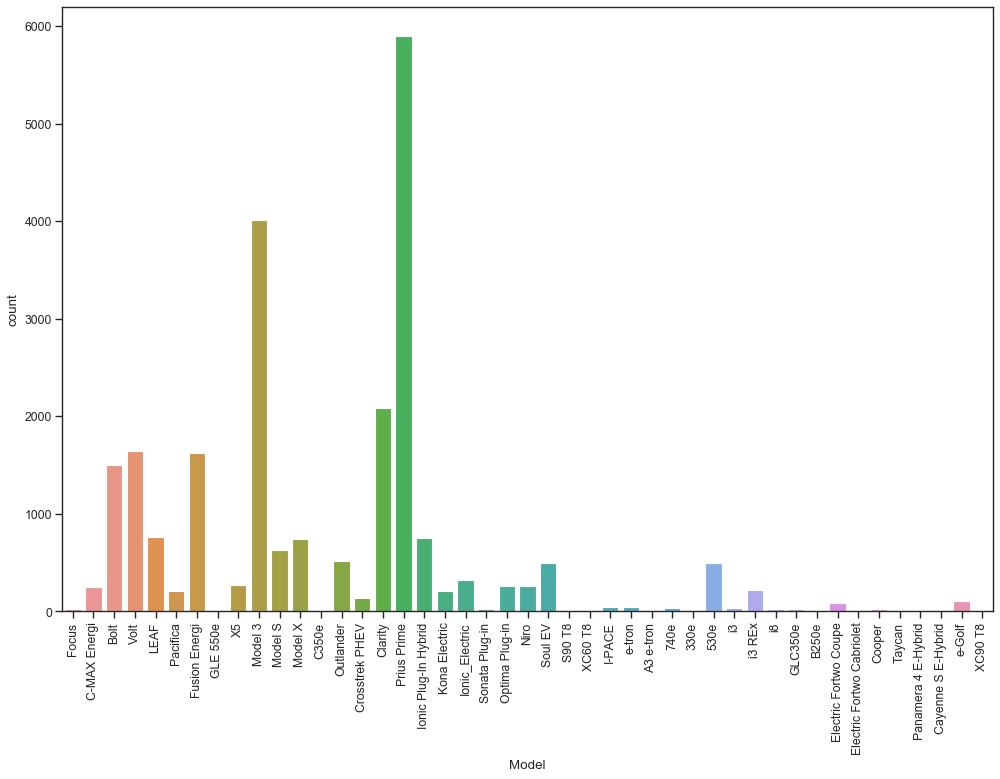

In [81]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

sns.countplot(x='Model',data=dfev)
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks( rotation='vertical')

(array([0, 1]), <a list of 2 Text xticklabel objects>)

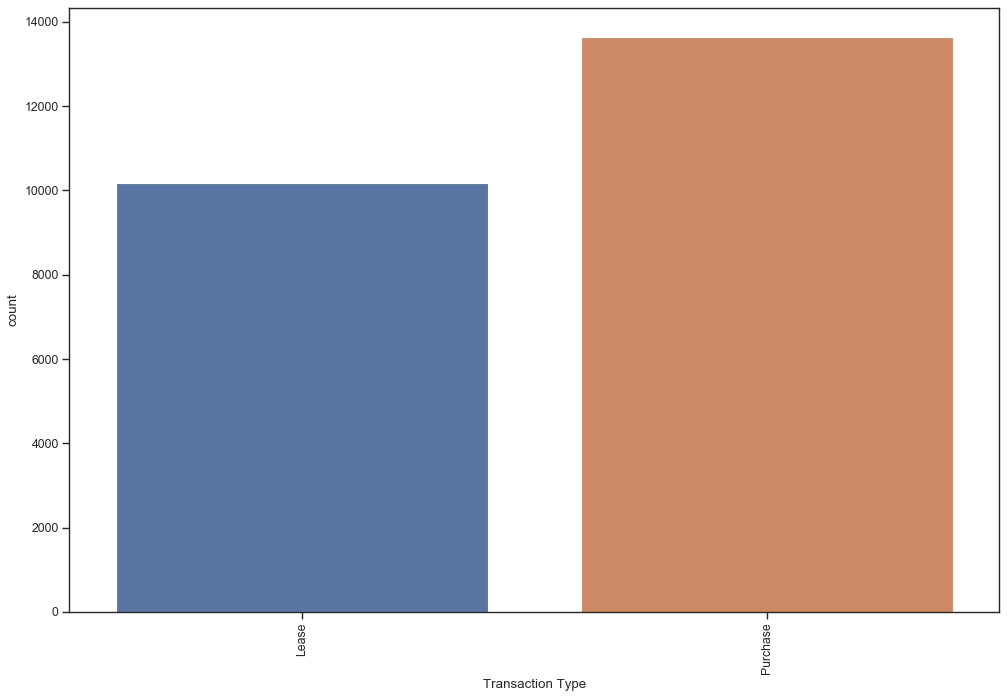

In [85]:
figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

sns.countplot(x='Transaction Type',data=dfev)
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks( rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52]),
 <a list of 53 Text xticklabel objects>)

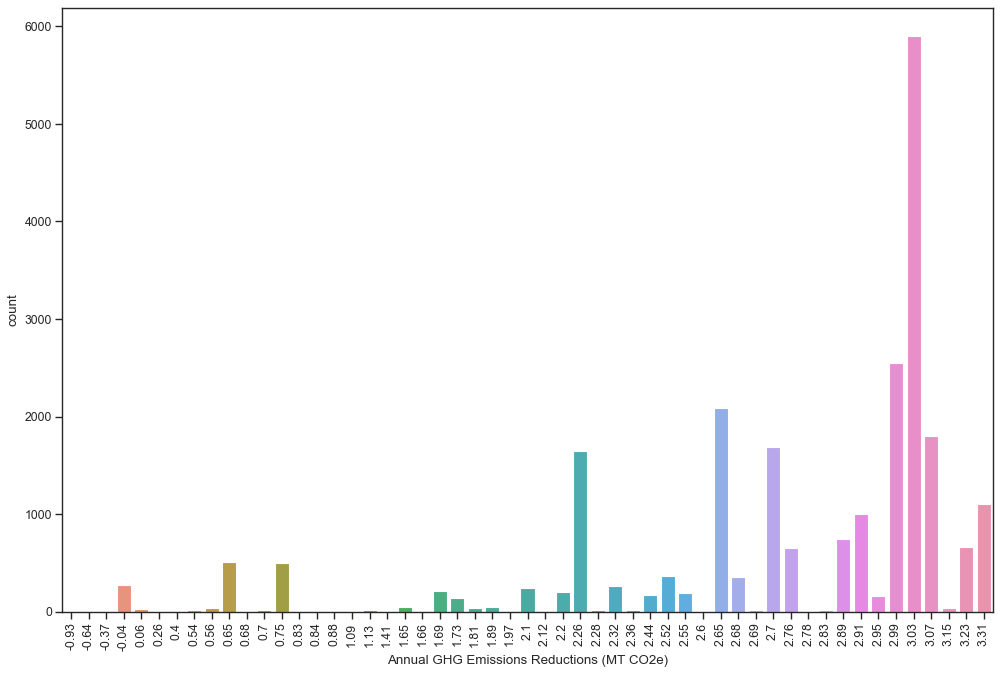

In [86]:
figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

sns.countplot(x='Annual GHG Emissions Reductions (MT CO2e)',data=dfev)
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks( rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

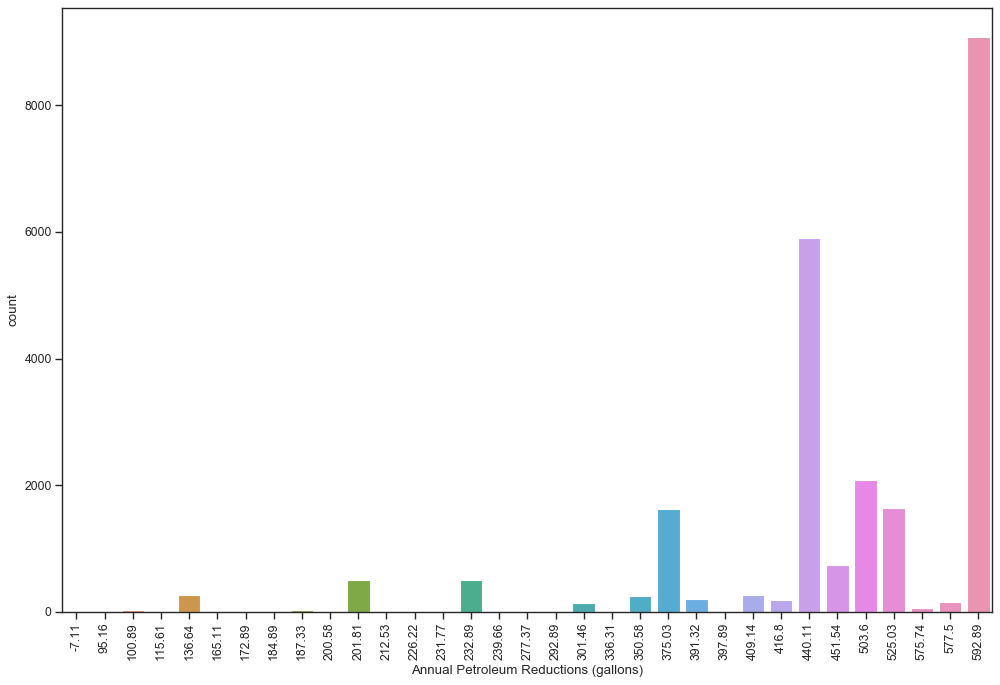

In [87]:
figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

sns.countplot(x='Annual Petroleum Reductions (gallons)',data=dfev)
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks( rotation='vertical')

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

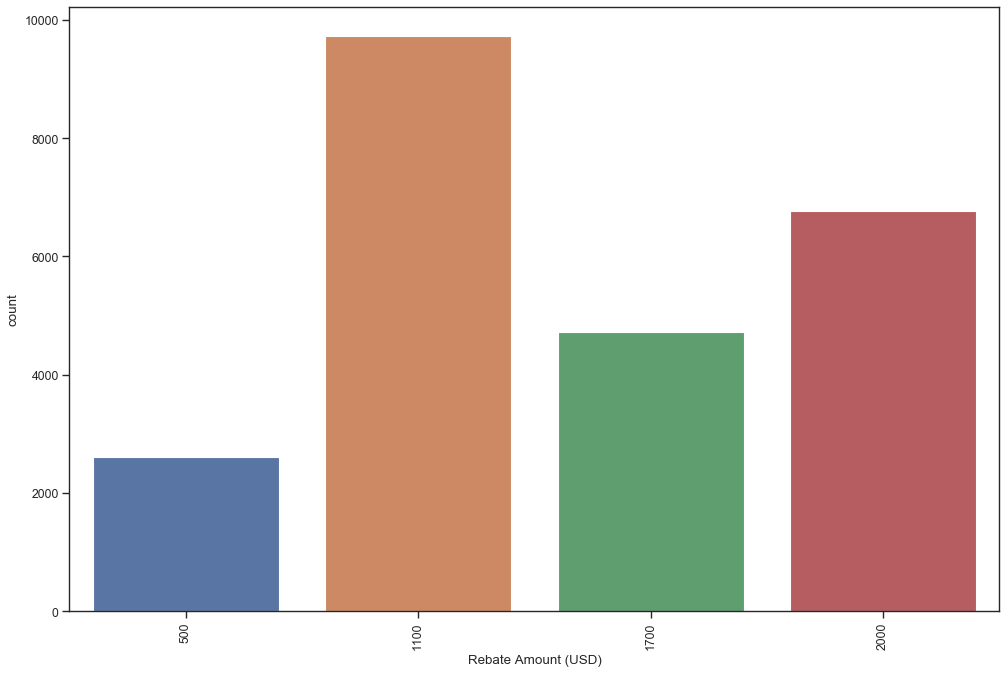

In [91]:
figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')

sns.countplot(x='Rebate Amount (USD)',data=dfev)
# You can specify a rotation for the tick labels in degrees or with keywords.
plt.xticks( rotation='vertical')